<a href="https://colab.research.google.com/github/dzarulhaziq/FeedForward_DiamondPricePredicitoon/blob/main/DiamonPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import necessary packages

In [11]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt
import datetime
import os

# 2. Read the dataset and identify the features and label

In [12]:
# Importing data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Miniproject2/Datasets/diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 3. Remove unnecessary **column**

In [13]:
data = data.drop('Unnamed: 0',axis=1)

# 4. Split the data into features and label

In [14]:
data_features = data.copy()
data_label = data_features.pop('price')

# 5. Check the data

In [15]:
print("------------------Features-------------------------")
print(data_features.head())
print("-----------------Label----------------------")
print(data_label.head())

------------------Features-------------------------
   carat      cut color clarity  depth  table     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75
-----------------Label----------------------
0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


# 6. Ordinal encode categorical features

In [16]:
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories = ['J','I','H','G','F','E','D']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
ordinal_encoder = OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])
data_features[['cut','color','clarity']] = ordinal_encoder.fit_transform(data_features[['cut','color','clarity']])

### 6.1 Check the transformed features

In [17]:
print("---------------Transformed Features--------------------")
print(data_features.head())

---------------Transformed Features--------------------
   carat  cut  color  clarity  depth  table     x     y     z
0   0.23  4.0    5.0      1.0   61.5   55.0  3.95  3.98  2.43
1   0.21  3.0    5.0      2.0   59.8   61.0  3.89  3.84  2.31
2   0.23  1.0    5.0      4.0   56.9   65.0  4.05  4.07  2.31
3   0.29  3.0    1.0      3.0   62.4   58.0  4.20  4.23  2.63
4   0.31  1.0    0.0      1.0   63.3   58.0  4.34  4.35  2.75


# 7. Split the data into train-validation-test sets, with a ratio of 60:20:20

In [18]:
SEED = 12345
x_train,x_iter,y_train,y_iter = train_test_split(data_features,data_label,test_size=0.4,random_state=SEED)
x_val,x_test,y_val,y_test = train_test_split(x_iter,y_iter,test_size=0.5,random_state=SEED)

# 8.  Perform feature scaling, using training data for fitting

In [19]:
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)
x_train = standard_scaler.transform(x_train)
x_val = standard_scaler.transform(x_val)
x_test = standard_scaler.transform(x_test)

# 9. Create a feedforward neural network using TensorFlow Keras

In [20]:
number_input = x_train.shape[-1]
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=number_input))
model.add(tf.keras.layers.Dense(128,activation='elu'))
model.add(tf.keras.layers.Dense(64,activation='elu'))
model.add(tf.keras.layers.Dense(32,activation='elu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

# 10.Compile the model

In [21]:
model.compile(optimizer='adam',loss='mse',metrics=['mae','mse'])

# 11. Train and evaluate the model with validation data

In [22]:
base_log_path = r"/content/drive/MyDrive/Colab Notebooks/Log"
log_path = os.path.join(base_log_path, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
EPOCHS = 100
BATCH_SIZE=64
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=BATCH_SIZE,epochs=EPOCHS)

Epoch 1/100
506/506 [==============================] - 6s 6ms/step - loss: 12107088.0000 - mae: 2208.6848 - mse: 12107088.0000 - val_loss: 2087632.5000 - val_mae: 1024.2738 - val_mse: 2087632.5000
Epoch 2/100
506/506 [==============================] - 2s 5ms/step - loss: 2291296.5000 - mae: 1062.5023 - mse: 2291296.5000 - val_loss: 1620329.8750 - val_mae: 818.5111 - val_mse: 1620329.8750
Epoch 3/100
506/506 [==============================] - 2s 5ms/step - loss: 2095894.7500 - mae: 979.7665 - mse: 2095894.7500 - val_loss: 1527308.3750 - val_mae: 771.4868 - val_mse: 1527308.3750
Epoch 4/100
506/506 [==============================] - 3s 5ms/step - loss: 1986427.8750 - mae: 918.2298 - mse: 1986427.8750 - val_loss: 1279656.0000 - val_mae: 681.1892 - val_mse: 1279656.0000
Epoch 5/100
506/506 [==============================] - 3s 5ms/step - loss: 1802248.7500 - mae: 838.6428 - mse: 1802248.7500 - val_loss: 1097266.7500 - val_mae: 601.7502 - val_mse: 1097266.7500
Epoch 6/100
506/506 [=========

#12. Evaluate with test data for wild testing

In [23]:
test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test MAE = {test_result[1]}")
print(f"Test MSE = {test_result[2]}")

169/169 [==============================] - 1s 3ms/step - loss: 740780.1875 - mae: 331.3981 - mse: 740780.1875
Test loss = 740780.1875
Test MAE = 331.39813232421875
Test MSE = 740780.1875


#12. Plot a graph of prediction vs label on test data

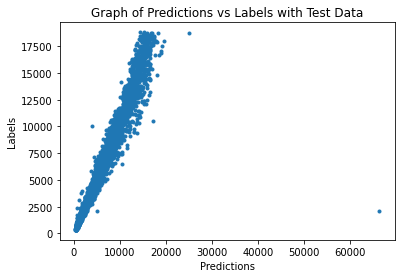

In [24]:
predictions = np.squeeze(model.predict(x_test))
labels = np.squeeze(y_test)
plt.plot(predictions,labels,".")
plt.xlabel("Predictions")
plt.ylabel("Labels")
plt.title("Graph of Predictions vs Labels with Test Data")
save_path = r"/content/drive/MyDrive/Colab Notebooks/DiamondPrediction_graph"
plt.savefig(os.path.join(save_path,"result.png"),bbox_inches='tight')
plt.show()